In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import KBinsDiscretizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

## 2. Load the train and test dataset

In [94]:
# Load the data
excel_path = "LTF Challenge data with dictionary.xlsx"
train_df = pd.read_excel(excel_path, sheet_name="TrainData")
test_df = pd.read_excel(excel_path, sheet_name="TestData")
train_df.head()

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
0,1002818465057450,MADHYA PRADESH,CENTRAL,M,BARELI,464668,RAISEN,Seoni,M,NaN,...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,97.24,19.50,0.95,22.380262,33.527178,Poor,0.773129,0.00,1360000
1,1012300674433870,BIHAR,EAST,M,BANDRA,848125,MUZAFFARPUR,Namapur,M,NaN,...,DECCAN PLATEAU (TELANGANA) AND EASTERN GHATS ...,73.96,16.76,0.97,24.630262,37.173626,Poor,0.454140,0.00,807200
2,1013472263587380,MADHYA PRADESH,CENTRAL,M,MALHARGARH,458556,MANDSAUR,Billaud,M,NaN,...,CENTRAL HIGHLANDS ( MALWA ) GUJARAT PLAIN AND...,90.05,22.44,0.95,19.493313,28.848462,Poor,0.657040,0.00,500000
3,1019525480704050,MAHARASHTRA,WEST,M,RENAPUR,413527,LATUR,Renapur,M,NaN,...,DECCAN PLATU HOT SEMI-ARID ECO-REGION,94.64,21.48,0.98,31.836367,48.852156,Average,0.235615,2.49,558000
4,1021915867444260,MADHYA PRADESH,CENTRAL,F,KHURAI,470117,SAGAR,Singhpur,M,NaN,...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,95.90,18.93,0.97,21.327371,31.820817,Poor,0.207264,0.00,800000


In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47970 entries, 0 to 47969
Columns: 105 entries, FarmerID to Target_Variable/Total Income
dtypes: float64(62), int64(5), object(38)
memory usage: 38.4+ MB


In [72]:
test_df.head()

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
0,576972022499073,KARNATAKA,SOUTH,M,TUMAKURU,572102,TUMKUR,Tumkur,M,"13.3173175,77.1240408",...,EASTERN GHATS AND TAMIL NADU UPLANDS AND DECCA...,92.35,23.34,0.97,34.633257,53.384919,Good,0.000118,8.85,NaN
1,979235081831136,HARYANA,NORTH,M,KALKA,133302,PANCHKULA,Kalka,M,"30.4749107,77.1320795",...,NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23,NaN
2,176490610549774,HARYANA,NORTH,M,PINJORE,134102,PANCHKULA,Kalka,M,NaN,...,NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23,NaN
3,977021407171384,HARYANA,NORTH,M,PINJORE,134102,PANCHKULA,Kalka,S,NaN,...,NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23,NaN
4,1334154133262320,HARYANA,NORTH,M,PINJORE,134102,PANCHKULA,Kalka,M,"30.7982131,76.9209035",...,NORTHERN PLAIN HOT SUBHUMID (DRY) ECO-REGION,43.91,12.77,0.94,32.964252,50.680057,Good,0.000268,43.23,NaN


## 3. Imputing null values for train and test data

In [ ]:
# Null values in training data
null_counts = train_df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts.sort_values(ascending=False))

Avg_Disbursement_Amount_Bureau                                  20790
Location                                                        17030
Address type                                                    17030
Ownership                                                       17030
Perc_of_house_with_6plus_room                                     168
Women_15_19_Mothers_or_Pregnant_at_time_of_survey                 168
perc_of_pop_living_in_hh_electricity                              168
perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms       168
mat_roof_Metal_GI_Asbestos_sheets                                 168
perc_of_Wall_material_with_Burnt_brick                            168
Households_with_improved_Sanitation_Facility                      168
perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k      168
Total_Land_For_Agriculture                                         71
dtype: int64


In [91]:
# Null values in testing data
null_counts = test_df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts.sort_values(ascending=False))

Target_Variable/Total Income                                    9986
Avg_Disbursement_Amount_Bureau                                  4262
Location                                                        3569
Address type                                                    3569
Ownership                                                       3569
Perc_of_house_with_6plus_room                                     33
Women_15_19_Mothers_or_Pregnant_at_time_of_survey                 33
perc_of_pop_living_in_hh_electricity                              33
perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms       33
mat_roof_Metal_GI_Asbestos_sheets                                 33
perc_of_Wall_material_with_Burnt_brick                            33
Households_with_improved_Sanitation_Facility                      33
perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k      33
Total_Land_For_Agriculture                                        16
dtype: int64


In [65]:
# Drop identifier
train_df_dropped = train_df.drop(columns=["FarmerID"])
test_df_dropped = test_df.drop(columns=["FarmerID"])

# Step 1: Null Value Imputation
num_cols = train_df_dropped.select_dtypes(include=np.number).columns.tolist()
cat_cols = train_df_dropped.select_dtypes(exclude=np.number).columns.tolist()

# Imputation logic
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

train_df_dropped[num_cols] = num_imputer.fit_transform(train_df_dropped[num_cols])
train_df_dropped[cat_cols] = cat_imputer.fit_transform(train_df_dropped[cat_cols])
test_df_dropped[num_cols] = num_imputer.transform(test_df_dropped[num_cols])
test_df_dropped[cat_cols] = cat_imputer.transform(test_df_dropped[cat_cols])

print(f"Null values in train_df after imputation: {train_df_dropped.isnull().sum().sum()}")

Null values in train_df after imputation: 0


In [92]:
print(f"Number of Numerical columns: {len(num_cols)}")
print(f"Number of Categorical columns: {len(cat_cols)}")

Number of Numerical columns: 65
Number of Categorical columns: 38


## 4. Checking distribution of Target Variable (EDA)

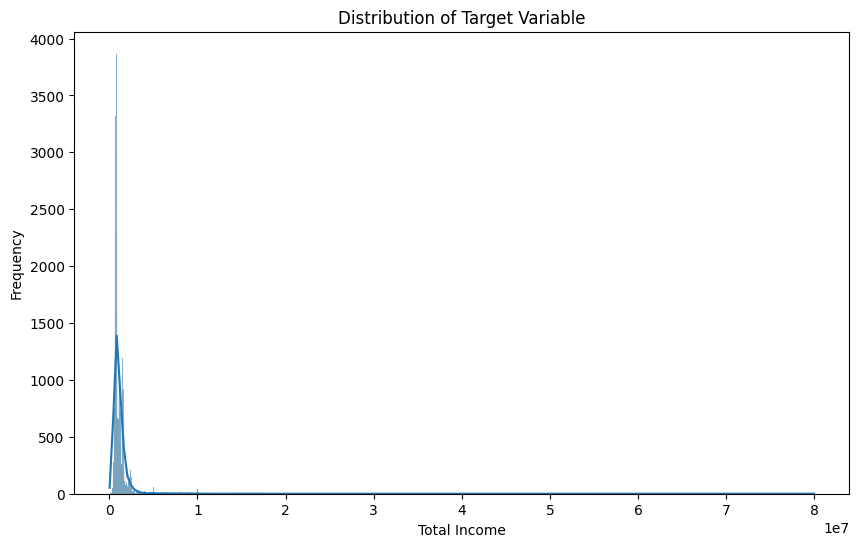

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Target_Variable/Total Income'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.show()
# # Step 2: EDA Graphs
# for col in num_cols:
#     plt.figure()
#     sns.histplot(train_df[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.show()

# for col in cat_cols:
#     plt.figure()
#     train_df[col].value_counts().plot(kind='bar')
#     plt.title(f'Count plot of {col}')
#     plt.show()

## 5. Split the data for min/max columns

In [ ]:
# Step 3: Column Splitting (Rainfall min/max if applicable)
for col in train_df_dropped.columns:
    if "min" in str(train_df_dropped[col].iloc[0]).lower() and "max" in str(train_df_dropped[col].iloc[0]).lower():
        print(col)
        train_df_dropped[["Rainfall_Min", "Rainfall_Max"]] = train_df_dropped[col].str.extract(r"(\d+\.?\d*)\D+(\d+\.?\d*)").astype(float)
        test_df_dropped[["Rainfall_Min", "Rainfall_Max"]] = test_df_dropped[col].str.extract(r"(\d+\.?\d*)\D+(\d+\.?\d*)").astype(float)
        train_df_dropped.drop(columns=[col], inplace=True)
        test_df_dropped.drop(columns=[col], inplace=True)

In [93]:
for col in train_df.columns:
    if "min" in str(train_df[col].iloc[0]).lower() and "max" in str(train_df[col].iloc[0]).lower():
        print(col)

## 6. Encoding Categorical features and Dealing with multi-collinearity through PCA

In [ ]:
# Step 1: Ordinal 
X_temp = train_df_dropped.drop(columns=["Target_Variable/Total Income"])
X_test_temp = test_df_dropped.drop(columns=["Target_Variable/Total Income"])

cat_cols = X_temp.select_dtypes(exclude='number').columns.tolist()
num_cols = X_temp.select_dtypes(include='number').columns.tolist()

# Fit OrdinalEncoder on train and apply on both train and test
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_temp[cat_cols] = ordinal_encoder.fit_transform(X_temp[cat_cols])
X_test_temp[cat_cols] = ordinal_encoder.transform(X_test_temp[cat_cols])

# Step 3: Standard scale all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_temp)
X_test_scaled = scaler.transform(X_test_temp)

# Step 4: Apply PCA to retain 98% variance
pca = PCA(n_components=0.98, random_state=42)
X_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 5: Check number of components retained
print(f"Original train data shape: {X_scaled.shape}")
print(f"PCA-transformed train data shape: {X_pca.shape}")
print(f"Original test data shape: {X_test_scaled.shape}")
print(f"PCA-transformed test data shape: {X_test_pca.shape}")

Original train data shape: (47970, 103)
PCA-transformed train data shape: (47970, 58)
Original test data shape: (9986, 103)
PCA-transformed test data shape: (9986, 58)


## 7. Testing the ML models through a stratified sample dataset of 5000 records

In [53]:
# Step 1: Stratified sampling using binned y values
y = train_df["Target_Variable/Total Income"]
bins = KBinsDiscretizer(n_bins=30, encode='ordinal', strategy='quantile')
y_bins = bins.fit_transform(y.values.reshape(-1, 1)).flatten()
_, X_sampled, _, y_sampled = train_test_split(X_pca, y, stratify=y_bins, test_size=10000, random_state=42)

# Step 2: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Step 3: Define models
models = {
    "XGBRegressor": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "CatBoostRegressor": CatBoostRegressor(verbose=0, random_state=42)
}

# Step 4: Fit and evaluate MAPE
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, preds)
    print(f"{name}: MAPE = {mape:.4f}")

XGBRegressor: MAPE = 0.4376
RandomForestRegressor: MAPE = 0.4099
SVR: MAPE = 0.3439
CatBoostRegressor: MAPE = 0.3538


#### Since each model has similar performance, we build an ensemble taking simple average of all the four models

## 8. Building the base ensemble and training it

In [56]:
# Train-test 80-20 split
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=43)

In [57]:
# Step 2: Initialize models
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=43)
rf_model = RandomForestRegressor(n_estimators=100, random_state=43)
svr_model = SVR()
cb_model = CatBoostRegressor(verbose=0, random_state=43)

# Step 3: Train each model
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
cb_model.fit(X_train, y_train)

# Step 4: Predict on validation set
pred_xgb = xgb_model.predict(X_val)
pred_rf = rf_model.predict(X_val)
pred_svr = svr_model.predict(X_val)
pred_cb = cb_model.predict(X_val)

# Step 5: Simple average ensemble
final_pred = (pred_xgb + pred_rf + pred_svr + pred_cb) / 4

# Step 6: Calculate MAPE
final_mape = mean_absolute_percentage_error(y_val, final_pred)
print(f"Simple Average Ensemble MAPE on Validation Set: {final_mape:.4f}")

Simple Average Ensemble MAPE on Validation Set: 0.3105


## 9. Hyper-parameter Tuning for each model in the ensemble and re-calculating updated MAPE on validation data

In [58]:
# Step 1: Stratified sampling for 10,000 points
bins = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile')
y_bins = bins.fit_transform(y.values.reshape(-1, 1)).flatten()
_, X_sample, _, y_sample = train_test_split(X_pca, y, stratify=y_bins, test_size=7000, random_state=42)

# Step 2: Split sample into training and validation sets
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Step 3: Define hyperparameter search spaces
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1.0]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

svr_param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf', 'linear']
}

cb_param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300]
}

# Step 4: Tune each model using RandomizedSearchCV
scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

xgb_search = RandomizedSearchCV(XGBRegressor(random_state=42), xgb_param_grid, scoring=scorer, cv=3, n_iter=10, random_state=42)
xgb_search.fit(X_train_s, y_train_s)

rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, scoring=scorer, cv=3, n_iter=10, random_state=42)
rf_search.fit(X_train_s, y_train_s)

svr_search = RandomizedSearchCV(SVR(), svr_param_grid, scoring=scorer, cv=3, n_iter=10, random_state=42)
svr_search.fit(X_train_s, y_train_s)

cb_search = RandomizedSearchCV(CatBoostRegressor(verbose=0, random_state=42), cb_param_grid, scoring=scorer, cv=3, n_iter=10, random_state=42)
cb_search.fit(X_train_s, y_train_s)

# Step 5: Retrieve best estimators
best_xgb = xgb_search.best_estimator_
best_rf = rf_search.best_estimator_
best_svr = svr_search.best_estimator_
best_cb = cb_search.best_estimator_

In [85]:
print(f"Best XGBRegressor: {xgb_search.best_params_}")
print(f"Best RandomForestRegressor: {rf_search.best_params_}")
print(f"Best SVR: {svr_search.best_params_}")
print(f"Best CatBoostRegressor: {cb_search.best_params_}")

Best XGBRegressor: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1}
Best RandomForestRegressor: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': None}
Best SVR: {'kernel': 'linear', 'epsilon': 0.01, 'C': 10}
Best CatBoostRegressor: {'learning_rate': 0.1, 'iterations': 300, 'depth': 6}


In [59]:
# Step 6: Train ensemble on full training data with best hyperparameters
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(X_pca, y, test_size=0.2, random_state=42)

best_xgb.fit(X_train_full, y_train_full)
best_rf.fit(X_train_full, y_train_full)
best_svr.fit(X_train_full, y_train_full)
best_cb.fit(X_train_full, y_train_full)

# Step 7: Predict and compute MAPE
pred_xgb = best_xgb.predict(X_val_full)
pred_rf = best_rf.predict(X_val_full)
pred_svr = best_svr.predict(X_val_full)
pred_cb = best_cb.predict(X_val_full)

final_pred = (pred_xgb + pred_rf + pred_svr + pred_cb) / 4
final_mape = mean_absolute_percentage_error(y_val_full, final_pred)
print(f"Final Ensemble MAPE (with tuned hyperparameters): {final_mape:.4f}")

Final Ensemble MAPE (with tuned hyperparameters): 0.2955


In [89]:
print(f"MAPE for XGBRegressor: {mean_absolute_percentage_error(y_val_full, pred_xgb):.4f}")
print(f"MAPE for RandomForestRegressor: {mean_absolute_percentage_error(y_val_full, pred_rf):.4f}")
print(f"MAPE for SVR: {mean_absolute_percentage_error(y_val_full, pred_svr):.4f}")
print(f"MAPE for CatBoostRegressor: {mean_absolute_percentage_error(y_val_full, pred_cb):.4f}")

MAPE for XGBRegressor: 0.3065
MAPE for RandomForestRegressor: 0.3255
MAPE for SVR: 0.2908
MAPE for CatBoostRegressor: 0.3189


## 10. Finding the target values for the test data

In [110]:
# Step 4: Run through tuned ensemble models
pred_xgb_test = best_xgb.predict(X_test_pca)
pred_rf_test = best_rf.predict(X_test_pca)
pred_svr_test = best_svr.predict(X_test_pca)
pred_cb_test = best_cb.predict(X_test_pca)

# Step 5: Simple average ensemble prediction
final_test_pred = (pred_xgb_test + pred_rf_test + pred_svr_test + pred_cb_test) / 4

In [79]:
# Step 7: Create output DataFrame and export
output_df = pd.DataFrame({
    "FarmerID": test_df["FarmerID"].astype(str),
    "Target_Variable/Total Income": final_test_pred
})
output_df.to_excel("Ensemble_Predicted_Incomes.xlsx", index=False)

## 11. Optional - training the algorithm with the full dataset (without using PCA)

In [87]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_scaled, y, test_size=0.2, random_state=43)
# Step 2: Initialize models
xgb_model_2 = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=45, max_depth=6, subsample=0.9)
rf_model_2 = RandomForestRegressor(n_estimators= 300, min_samples_split= 10, max_depth= None, random_state=45)
svr_model_2 = SVR(kernel='linear', epsilon=0.1, C=10)
cb_model_2 = CatBoostRegressor(verbose=0, random_state=45, depth=6, learning_rate=0.1, iterations=300)

# Step 3: Train each model
xgb_model_2.fit(X_train_2, y_train_2)
rf_model_2.fit(X_train_2, y_train_2)
svr_model_2.fit(X_train_2, y_train_2)
cb_model_2.fit(X_train_2, y_train_2)

# Step 4: Predict on validation set
pred_xgb_2 = xgb_model_2.predict(X_val_2)
pred_rf_2 = rf_model_2.predict(X_val_2)
pred_svr_2 = svr_model_2.predict(X_val_2)
pred_cb_2 = cb_model_2.predict(X_val_2)

print(f"MAPE for XGBRegressor: {mean_absolute_percentage_error(y_val_2, pred_xgb_2):.4f}")
print(f"MAPE for RandomForestRegressor: {mean_absolute_percentage_error(y_val_2, pred_rf_2):.4f}")
print(f"MAPE for SVR: {mean_absolute_percentage_error(y_val_2, pred_svr_2):.4f}")
print(f"MAPE for CatBoostRegressor: {mean_absolute_percentage_error(y_val_2, pred_cb_2):.4f}")

# Step 5: Simple average ensemble
final_pred_2 = (pred_xgb_2 + pred_rf_2 + pred_svr_2 + pred_cb_2) / 4

# Step 6: Calculate MAPE
final_mape_2 = mean_absolute_percentage_error(y_val_2, final_pred_2)
print(f"Simple Average Ensemble MAPE on Validation Set: {final_mape_2:.4f}")

MAPE for XGBRegressor: 0.2496
MAPE for RandomForestRegressor: 0.2367
MAPE for SVR: 0.2919
MAPE for CatBoostRegressor: 0.2687
Simple Average Ensemble MAPE on Validation Set: 0.2443


In [109]:
pred_xgb_test_2 = xgb_model_2.predict(X_test_scaled)
pred_rf_test_2 = rf_model_2.predict(X_test_scaled)
pred_svr_test_2 = svr_model_2.predict(X_test_scaled)
pred_cb_test_2 = cb_model_2.predict(X_test_scaled)

# Step 5: Simple average ensemble prediction
final_test_pred_2 = (pred_xgb_test_2 + pred_rf_test_2 + pred_svr_test_2 + pred_cb_test_2) / 4

# Step 6: Compute final MAPE
final_test_mape_2 = mean_absolute_percentage_error(final_test_pred, final_test_pred_2)
print(f"Final Test MAPE (with PCA v/s without PCA): {final_test_mape_2:.4f}")

Final Test MAPE (with PCA v/s without PCA): 0.1179


#### Although we get a better accuracy, it usually is a result of overfitting and the training takes a lot of time, hence it is not efficient and scalable